In [1]:
import ROOT
import os, re, gc, h5py
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from IPython.utils.capture import capture_output
from joblib import Parallel, delayed
from data_utils import *

Welcome to JupyROOT 6.20/04


In [16]:
copa = pd.DataFrame({'aa':[1,2,3,4,5], 'bb':[2,5,62,2,5]})
ropa = np.arange(10)
ropa[copa[copa['bb']==62].index] = copa.loc[copa[copa['bb']==62].index, 'bb']
copa.loc[:,'cc'] = 32
copa

,aa,bb,cc
0,1,2,32
1,2,5,32
2,3,62,32
3,4,2,32
4,5,5,32


In [2]:
def root2hdf5(pol_ids=None, part_i=0, path=None, name=None, name_dict=None, dr=16, n_pol=8, return_pols=True):
    with capture_output() as caput:
        ims, pols = load_root_images(pol_ids, path+name+'/dm_tracks_cl.dm.root', dr=dr, n_pol=n_pol, return_pols=return_pols)
    with h5py.File('data_raw_root_ims_9pol_'+str(dr*2)+'.h5','a') as dfile:
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/images', data=ims)
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/pol_ids', data=pols)
    del ims, pols, caput;
    gc.collect();

In [3]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/100keV/0degr','Carbon/100keV/45degr','Carbon/100keV/90degr','Carbon/100keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [4]:
'Scan1_07.10  Scan2_08.10  Scan3_09.10  Scan4_10.10  Scan5_12.10  Scan6_21.10'.split('  ')

['Scan1_07.10',
 'Scan2_08.10',
 'Scan3_09.10',
 'Scan4_10.10',
 'Scan5_12.10',
 'Scan6_21.10']

In [5]:
name_dict

{'Carbon/100keV/0degr': 'Carbon/100keV/0degr',
 'Carbon/100keV/45degr': 'Carbon/100keV/45degr',
 'Carbon/100keV/90degr': 'Carbon/100keV/90degr',
 'Carbon/100keV/test': 'Carbon/100keV/test'}

# CROSS CHECK FOR ROOT CRASH

In [6]:
def root2hdf5_check(pol_ids=None, part_i=0, path=None, name=None, name_dict=None, dr=16, n_pol=8, return_pols=True):
    with capture_output() as caput:
        ims, pols = load_root_images(pol_ids, path+name+'/dm_tracks_cl.dm.root', dr=dr, n_pol=n_pol, return_pols=return_pols)
    _='''with h5py.File('data_raw_root_ims_9pol_'+str(dr*2)+'.h5','a') as dfile:
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/images', data=ims)
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/pol_ids', data=pols)'''
    del ims, pols, caput;
    gc.collect();

In [7]:
part_size=500

start = datetime.now()
for name in [class_names_ft[0]]:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5_check)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts[:2]))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/100keV/0degr
	loading  100  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




loaded in  0:05:20.204539 

total loading time: 0:05:20.254343
DMRRun::OpenExisting: Open an existing file /mnt/ML-drive/Artem/70nm/Oct2019_N123gf/Carbon/100keV/0degr/dm_tracks_cl.dm.root
Run 0
Matrix: 2320 x 1726  with pixel: 0.027470 x -0.027420
DMRView::FixEncoderFaults:  dx[0.0 0.0] dy[0.0 0.0] [nm]
DMRRun::OpenExisting: Open an existing file /mnt/ML-drive/Artem/70nm/Oct2019_N123gf/Carbon/100keV/0degr/dm_tracks_cl.dm.root
Run 0
Matrix: 2320 x 1726  with pixel: 0.027470 x -0.027420
DMRView::FixEncoderFaults:  dx[0.0 0.0] dy[0.0 0.0] [nm]
DMRRun::GetFrameRaw: 1 frames selected by cut ventr==61&&iz==5&&ipol==0&&flags==0
DMRImage::ExtractFragment: 751 +-40, 493 +-40
DMRRun::GetFrameRaw: 1 frames selected by cut ventr==61&&iz==5&&ipol==1&&flags==0
DMRImage::ExtractFragment: 751 +-40, 493 +-40
DMRRun::GetFrameRaw: 1 frames selected by cut ventr==61&&iz==5&&ipol==2&&flags==0
DMRImage::ExtractFragment: 751 +-40, 493 +-40
DMRRun::GetFrameRaw: 1 frames selected by cut ventr==61&&iz==5&&ipo

[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.3min finished
Error in <TCling::LoadPCM>: ROOT PCM /home/scanner-ml/DMDS/dm2root/lib/DMRootCint_rdict.pcm file does not exist
Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libASImageGui_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libASImage_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libEG_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libEve_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libFFTW_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libFITSIO_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /home/scanner-ml/ROOT/lib/libFitPanel_rdict.pcm

Info in <TCling::Lo

# END OF CROSS CHECK

## Carbon 100keV

In [6]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/100keV/0degr
	loading  100  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 31.7min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed: 77.0min finished




loaded in  1:17:02.879146 

Carbon/100keV/45degr
	loading  127  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 34.1min
[Parallel(n_jobs=6)]: Done 127 out of 127 | elapsed: 103.9min finished




loaded in  1:43:52.487495 

Carbon/100keV/90degr
	loading  127  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 34.0min
[Parallel(n_jobs=6)]: Done 127 out of 127 | elapsed: 105.5min finished




loaded in  1:45:30.873543 

Carbon/100keV/test
	loading  156  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 27.9min


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [7]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/100keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [11]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/100keV/test
	loading  156  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 27.2min
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done 156 out of 156 | elapsed: 102.3min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: 

## Carbon 60keV

In [12]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [13]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/60keV/0degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 43.9min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 168.2min finished




loaded in  2:48:11.659438 

Carbon/60keV/45degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 40.1min


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [17]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print(df['Carbon/60keV'].keys())
    #del df['Carbon/60keV/45degr']

<KeysViewHDF5 ['0degr']>


In [18]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [19]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/60keV/45degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 40.0min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 160.9min finished




loaded in  2:40:56.927174 

Carbon/60keV/90degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 40.4min


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [9]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print(df['Carbon/60keV'].keys())
    #del df['Carbon/60keV/90degr']

<KeysViewHDF5 ['0degr', '45degr']>


In [10]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/60keV/90degr','Carbon/60keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [11]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/60keV/90degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 39.8min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 154.6min finished




loaded in  2:34:34.760520 

Carbon/60keV/test
	loading  238  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 28.3min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 130.7min
[Parallel(n_jobs=6)]: Done 238 out of 238 | elapsed: 164.1min finished
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary m

## Carbon 30keV

In [6]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/30keV/0degr','Carbon/30keV/45degr','Carbon/30keV/90degr','Carbon/30keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [7]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/30keV/0degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 44.0min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 170.6min finished




loaded in  2:50:35.350343 

Carbon/30keV/45degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [10]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print(df['Carbon/30keV'].keys())
    #del df['Carbon/30keV/45degr']

<KeysViewHDF5 ['0degr']>


In [6]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/30keV/45degr','Carbon/30keV/90degr','Carbon/30keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [7]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/30keV/45degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 45.6min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 176.9min finished




loaded in  2:56:54.692620 

Carbon/30keV/90degr
	loading  161  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 45.2min
[Parallel(n_jobs=6)]: Done 161 out of 161 | elapsed: 174.4min finished




loaded in  2:54:27.039561 

Carbon/30keV/test
	loading  213  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 36.3min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 164.8min
[Parallel(n_jobs=6)]: Done 213 out of 213 | elapsed: 185.2min finished




loaded in  3:05:09.713456 

total loading time: 8:56:31.579817


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

## Fog

In [4]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan10_27.10  Scan12_29.10  Scan15_02.11  Scan18_25.11  Scan21_2.12  Scan3_09.10  Scan6_21.10  Scan9_26.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [5]:
name_dict

{'fog/Scan10_27.10': 'fog/Scan10',
 'fog/Scan12_29.10': 'fog/Scan12',
 'fog/Scan15_02.11': 'fog/Scan15',
 'fog/Scan18_25.11': 'fog/Scan18',
 'fog/Scan21_2.12': 'fog/Scan21',
 'fog/Scan3_09.10': 'fog/Scan3',
 'fog/Scan6_21.10': 'fog/Scan6',
 'fog/Scan9_26.10': 'fog/Scan9'}

In [6]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan10
	loading  5  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:  3.8min finished




loaded in  0:03:46.894986 

fog/Scan12
	loading  8  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 out of   8 | elapsed:  4.1min remaining:  1.4min
[Parallel(n_jobs=6)]: Done   8 out of   8 | elapsed:  7.4min finished




loaded in  0:07:21.360273 

fog/Scan15
	loading  35  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [9]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print(df['fog'].keys())
    #del df['fog/Scan15']

<KeysViewHDF5 ['Scan10', 'Scan12']>


In [10]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan15_02.11  Scan18_25.11  Scan21_2.12  Scan3_09.10  Scan6_21.10  Scan9_26.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [12]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan15
	loading  35  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed: 41.6min finished




loaded in  0:41:36.380103 

fog/Scan18
	loading  15  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed: 12.8min finished




loaded in  0:12:49.830061 

fog/Scan21
	loading  11  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:  8.2min finished




loaded in  0:08:12.797361 

fog/Scan3
	loading  17  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  17 out of  17 | elapsed: 14.7min finished




loaded in  0:14:42.766176 

fog/Scan6
	loading  10  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  8.3min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  8.3min finished




loaded in  0:08:20.593142 

fog/Scan9
	loading  26  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed: 30.1min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <T

In [6]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan1_07.10  Scan13_30.10  Scan16_04.11  Scan19_28.11  Scan22_3.12  Scan4_10.10  Scan7_22.10  Scan11_28.10  Scan14_31.10  Scan17_22.11  Scan2_08.10  Scan23_4.12  Scan5_12.10  Scan8_25.100'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [8]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan1
	loading  14  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed: 12.5min finished




loaded in  0:12:30.407025 

fog/ Scan13


FileNotFoundError: [Errno 2] File b'/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/fog/ Scan13_30.10/imcheck_bfcl.txt' does not exist: b'/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/fog/ Scan13_30.10/imcheck_bfcl.txt'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm


In [6]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan13_30.10  Scan16_04.11  Scan19_28.11  Scan22_3.12  Scan4_10.10  Scan7_22.10  Scan11_28.10  Scan14_31.10  Scan17_22.11  Scan2_08.10  Scan23_4.12  Scan5_12.10  Scan8_25.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [8]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan13
	loading  13  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 out of  13 | elapsed: 10.7min finished




loaded in  0:10:39.333841 

fog/Scan16
	loading  10  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  8.1min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  8.1min finished




loaded in  0:08:05.769374 

fog/Scan19
	loading  14  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed: 12.5min finished




loaded in  0:12:28.357323 

fog/Scan22
	loading  15  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed: 13.0min finished




loaded in  0:12:59.903505 

fog/Scan4
	loading  19  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  19 out of  19 | elapsed: 17.7min finished




loaded in  0:17:42.732599 

fog/Scan7
	loading  14  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed: 12.2min finished




loaded in  0:12:11.921918 

fog/Scan11
	loading  6  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:  3.7min remaining:  7.4min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  3.8min finished




loaded in  0:03:48.516440 

fog/Scan14
	loading  11  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:  8.4min finished




loaded in  0:08:26.401859 

fog/Scan17
	loading  68  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 65.0min
[Parallel(n_jobs=6)]: Done  68 out of  68 | elapsed: 109.9min finished




loaded in  1:49:55.304541 

fog/Scan2
	loading  16  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed: 13.8min finished




loaded in  0:13:46.633404 

fog/Scan23
	loading  17  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  17 out of  17 | elapsed: 13.7min finished




loaded in  0:13:42.636510 

fog/Scan5
	loading  51  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 54.5min
[Parallel(n_jobs=6)]: Done  51 out of  51 | elapsed: 69.8min finished




loaded in  1:09:47.461633 

fog/Scan8
	loading  11  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed:  8.9min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <T

In [10]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print(df['fog'].keys())
    print(len(df['fog'].keys()))
    #del df['fog/Scan15']

<KeysViewHDF5 ['Scan1', 'Scan10', 'Scan11', 'Scan12', 'Scan13', 'Scan14', 'Scan15', 'Scan16', 'Scan17', 'Scan18', 'Scan19', 'Scan2', 'Scan21', 'Scan22', 'Scan23', 'Scan3', 'Scan4', 'Scan5', 'Scan6', 'Scan7', 'Scan8', 'Scan9']>
22


## Gamma

In [6]:
gc.collect()

7

In [7]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['gamma/gamma_check/gamma_opmark']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name[:6]+name.split('gamma_')[-1] for name in class_names_ft}

In [8]:
name_dict

{'gamma/gamma_check/gamma_opmark': 'gamma/opmark'}

In [9]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:70100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma/opmark
	loading  141  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 17.9min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 24.3min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 30.7min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 42.8min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 54.5min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 62.3min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 78.7min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 92.0min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 104.7min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 122.7min
[Parallel(n_jobs=6)]: Done 141 out of 141 | elapsed: 146.9min finished
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crash

In [10]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['gamma/gamma_check/gamma_opmark_med']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name[:6]+name.split('gamma_')[-1] for name in class_names_ft}

In [11]:
name_dict

{'gamma/gamma_check/gamma_opmark_med': 'gamma/opmark_med'}

In [12]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:70100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma/opmark_med
	loading  90  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 15.8min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 20.9min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 26.5min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 36.0min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 46.0min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 52.5min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 66.3min
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed: 77.7min finished
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_lim

In [13]:
gc.collect()

0

In [16]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['gamma/gamma_check/gamma_nomark']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name[:6]+name.split('gamma_')[-1] for name in class_names_ft}

In [17]:
name_dict

{'gamma/gamma_check/gamma_nomark': 'gamma/nomark'}

In [18]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:70100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma/nomark
	loading  141  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 21.7min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 29.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 36.5min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 50.6min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 64.7min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 73.3min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 93.3min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 108.2min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 123.3min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 144.1min
[Parallel(n_jobs=6)]: Done 141 out of 141 | elapsed: 172.4min finished




loaded in  2:52:22.000036 



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm


## Isolated==2

In [19]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['Carbon/100keV/0degr','Carbon/100keV/45degr','Carbon/100keV/90degr','Carbon/100keV/test', 'Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test', 'Carbon/30keV/0degr','Carbon/30keV/45degr','Carbon/30keV/90degr','Carbon/30keV/test']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')]
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [20]:
# puuting additional parts after 500 to avoid overriding
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    pol_ids = pol_ids[pol_ids['tr_flag']==2]
    #print(pol_ids.shape, np.unique(pol_ids['tr_flag']))
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, 500+i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/100keV/0degr
(3890, 13) [2]
	loading  8  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 out of   8 | elapsed:  5.2min remaining:  1.7min
[Parallel(n_jobs=6)]: Done   8 out of   8 | elapsed:  9.7min finished




loaded in  0:09:41.915897 

Carbon/100keV/45degr
(4045, 13) [2]
	loading  9  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   9 out of   9 | elapsed: 10.5min finished




loaded in  0:10:28.145263 

Carbon/100keV/90degr
(4291, 13) [2]
	loading  9  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   9 out of   9 | elapsed: 10.6min finished




loaded in  0:10:33.946296 

Carbon/100keV/test
(5675, 13) [2]
	loading  12  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed:  9.1min finished




loaded in  0:09:05.452736 

Carbon/60keV/0degr
(24213, 13) [2]
	loading  49  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 47.4min
[Parallel(n_jobs=6)]: Done  49 out of  49 | elapsed: 56.6min finished




loaded in  0:56:39.904980 

Carbon/60keV/45degr
(6742, 13) [2]
	loading  14  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed: 18.0min finished




loaded in  0:17:59.831925 

Carbon/60keV/90degr
(9522, 13) [2]
	loading  20  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed: 24.0min finished




loaded in  0:23:58.554955 

Carbon/60keV/test
(5801, 13) [2]
	loading  12  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed:  9.3min finished




loaded in  0:09:18.774904 

Carbon/30keV/0degr
(5081, 13) [2]
	loading  11  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  11 out of  11 | elapsed: 13.4min finished




loaded in  0:13:27.075558 

Carbon/30keV/45degr
(3221, 13) [2]
	loading  7  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   4 out of   7 | elapsed:  7.4min remaining:  5.5min
[Parallel(n_jobs=6)]: Done   7 out of   7 | elapsed: 10.0min finished




loaded in  0:10:02.798671 

Carbon/30keV/90degr
(3007, 13) [2]
	loading  7  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   4 out of   7 | elapsed:  7.2min remaining:  5.4min
[Parallel(n_jobs=6)]: Done   7 out of   7 | elapsed:  7.4min finished




loaded in  0:07:22.442522 

Carbon/30keV/test
(4028, 13) [2]
	loading  9  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done   9 out of   9 | elapsed: 11.0min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <T

In [21]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['gamma/gamma_check/gamma_nomark', 'gamma/gamma_check/gamma_opmark_med', 'gamma/gamma_check/gamma_opmark']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name[:6]+name.split('gamma_')[-1] for name in class_names_ft}

In [22]:
name_dict

{'gamma/gamma_check/gamma_nomark': 'gamma/nomark',
 'gamma/gamma_check/gamma_opmark_med': 'gamma/opmark_med',
 'gamma/gamma_check/gamma_opmark': 'gamma/opmark'}

In [23]:
# puuting additional parts after 500 to avoid overriding
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    pol_ids = pol_ids[pol_ids['tr_flag']==2]
    #print(pol_ids.shape, np.unique(pol_ids['tr_flag']))
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, 500+i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma/nomark
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    9.5s finished




loaded in  0:00:09.807433 

gamma/opmark_med
	loading  10  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 16.9min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 16.9min finished




loaded in  0:16:54.576107 

gamma/opmark
	loading  26  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed: 49.3min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <T

# REPROCESS THE WHOLE NO MARK

In [26]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['gamma/gamma_check/gamma_nomark']#['fog/'+n for n in 'Scan5_12.10  Scan6_21.10'.split('  ')] #['Carbon/60keV/test']#['Carbon/60keV/0degr','Carbon/60keV/45degr','Carbon/60keV/90degr','Carbon/60keV/test']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name[:6]+name.split('gamma_')[-1] for name in class_names_ft}

In [27]:
# puuting additional parts after 500 to avoid overriding
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    pol_ids = pol_ids[pol_ids['tr_flag']==2]
    print(pol_ids.shape, np.unique(pol_ids['tr_flag']))
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, 500+i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma/nomark
(17772, 13) [2]
	loading  36  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed: 66.7min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm


In [3]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan10_27.10  Scan12_29.10  Scan15_02.11  Scan18_25.11  Scan21_2.12  Scan3_09.10  Scan6_21.10  Scan9_26.10  Scan1_07.10  Scan13_30.10  Scan16_04.11  Scan19_28.11  Scan22_3.12  Scan4_10.10  Scan7_22.10  Scan11_28.10  Scan14_31.10  Scan17_22.11  Scan2_08.10  Scan23_4.12  Scan5_12.10  Scan8_25.10'.split('  ')]
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [4]:
name_dict

{'fog/Scan10_27.10': 'fog/Scan10',
 'fog/Scan12_29.10': 'fog/Scan12',
 'fog/Scan15_02.11': 'fog/Scan15',
 'fog/Scan18_25.11': 'fog/Scan18',
 'fog/Scan21_2.12': 'fog/Scan21',
 'fog/Scan3_09.10': 'fog/Scan3',
 'fog/Scan6_21.10': 'fog/Scan6',
 'fog/Scan9_26.10': 'fog/Scan9',
 'fog/Scan1_07.10': 'fog/Scan1',
 'fog/Scan13_30.10': 'fog/Scan13',
 'fog/Scan16_04.11': 'fog/Scan16',
 'fog/Scan19_28.11': 'fog/Scan19',
 'fog/Scan22_3.12': 'fog/Scan22',
 'fog/Scan4_10.10': 'fog/Scan4',
 'fog/Scan7_22.10': 'fog/Scan7',
 'fog/Scan11_28.10': 'fog/Scan11',
 'fog/Scan14_31.10': 'fog/Scan14',
 'fog/Scan17_22.11': 'fog/Scan17',
 'fog/Scan2_08.10': 'fog/Scan2',
 'fog/Scan23_4.12': 'fog/Scan23',
 'fog/Scan5_12.10': 'fog/Scan5',
 'fog/Scan8_25.10': 'fog/Scan8'}

In [10]:
# puuting additional parts after 500 to avoid overriding
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    pol_ids = pol_ids[pol_ids['tr_flag']==2]
    print(pol_ids.shape, np.unique(pol_ids['tr_flag']))
    #continue
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, 500+i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan10
(212, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  1.6min finished




loaded in  0:01:37.465137 

fog/Scan12
(335, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  2.6min finished




loaded in  0:02:37.845180 

fog/Scan15
(1300, 13) [2]
	loading  3  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  7.4min finished




loaded in  0:07:24.674932 

fog/Scan18
(688, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  4.3min finished




loaded in  0:04:18.282474 

fog/Scan21
(362, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  2.8min finished




loaded in  0:02:49.947653 

fog/Scan3
(691, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.0min finished




loaded in  0:05:02.227897 

fog/Scan6
(377, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  3.5min finished




loaded in  0:03:29.550780 

fog/Scan9
(884, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  8.1min finished




loaded in  0:08:03.697475 

fog/Scan1
(493, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  4.8min finished




loaded in  0:04:50.776316 

fog/Scan13
(392, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  3.7min finished




loaded in  0:03:44.182632 

fog/Scan16
(336, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  3.0min finished




loaded in  0:03:02.516451 

fog/Scan19
(574, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.0min finished




loaded in  0:05:00.220024 

fog/Scan22
(600, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.1min finished




loaded in  0:05:08.511666 

fog/Scan4
(702, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  6.3min finished




loaded in  0:06:16.735685 

fog/Scan7
(644, 13) [2]
	loading  2  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  5.1min finished




loaded in  0:05:08.078319 

fog/Scan11
(261, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  2.2min finished




loaded in  0:02:14.447105 

fog/Scan14
(395, 13) [2]
	loading  1  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  3.8min finished




loaded in  0:03:46.351637 

fog/Scan17
(3351, 13) [2]
	loading  7  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   4 out of   7 | elapsed: 18.7min remaining: 14.0min


OSError: Unable to create file (unable to open file: name = 'data_raw_root_ims_9pol_80.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRoo

In [14]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    print([p for p in df['fog/Scan17'].keys() if '5' in p])
    #for p in ['part500', 'part501', 'part502', 'part504', 'part505']: del df['fog/Scan17/'+p]

['part15', 'part25', 'part35', 'part45', 'part5', 'part50', 'part51', 'part52', 'part53', 'part54', 'part55', 'part56', 'part57', 'part58', 'part59', 'part65']


In [15]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['fog/'+n for n in 'Scan17_22.11  Scan2_08.10  Scan23_4.12  Scan5_12.10  Scan8_25.10'.split('  ')]
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name.split('_')[0] for name in class_names_ft}

In [16]:
name_dict

{'fog/Scan17_22.11': 'fog/Scan17',
 'fog/Scan2_08.10': 'fog/Scan2',
 'fog/Scan23_4.12': 'fog/Scan23',
 'fog/Scan5_12.10': 'fog/Scan5',
 'fog/Scan8_25.10': 'fog/Scan8'}

In [17]:
# puuting additional parts after 500 to avoid overriding
part_size=250

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    pol_ids = pol_ids[pol_ids['tr_flag']==2]
    print(pol_ids.shape, np.unique(pol_ids['tr_flag']))
    #continue
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff[:80100]]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=1)(delayed(root2hdf5)(pols, 500+i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

fog/Scan17
(3351, 13) [2]
	loading  14  parts of  250  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed: 25.7min finished




loaded in  0:25:41.052540 

fog/Scan2
(608, 13) [2]
	loading  3  parts of  250  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  4.0min finished




loaded in  0:04:00.246979 

fog/Scan23
(713, 13) [2]
	loading  3  parts of  250  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  3.9min finished




loaded in  0:03:51.634872 

fog/Scan5
(1821, 13) [2]
	loading  8  parts of  250  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 out of   8 | elapsed:  7.5min remaining:  2.5min
[Parallel(n_jobs=6)]: Done   8 out of   8 | elapsed: 13.8min finished




loaded in  0:13:48.527116 

fog/Scan8
(326, 13) [2]
	loading  2  parts of  250  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:  3.6min finished
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <T

# SHIFT-SCALING

In [10]:
def shift_scale(imgs, remove_mode=True, scale=True, reject_peak=1.0, reject_bright=0.02, bright_thr=20):
    imgs = imgs.astype(np.float32) if scale else imgs.astype(np.int16)
    moda, meda = None, None
    drop_list = []
    if remove_mode:
        moda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        meda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        for i,im in enumerate(imgs):
            for j,pol_im in enumerate(im.T):
                if pol_im.any():
                    if (pol_im>256*reject_peak).any() and not i in drop_list: drop_list.append(i)
                    moda[i,j] = sp.stats.mode(pol_im, axis=None)[0]
                    meda[i,j] = np.median(pol_im)
                    imgs[i,...,j] -= moda[i,j]
        thr = min(np.quantile(meda, 1-reject_bright), bright_thr)
        for i,med in enumerate(meda):
            if (med>thr).any() and not i in drop_list: drop_list.append(i)
    if scale: imgs /= 256*reject_peak
    mask = np.ones(imgs.shape[0],dtype=bool)
    if drop_list: mask[drop_list]=False
    return imgs[mask], moda, meda, mask

In [19]:
angles = ['0degr','45degr','90degr']
name = 'Carbon/100keV'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)
print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/108 [00:00<?, ?it/s]

Loading angle: 0degr


parts:   0%|          | 0/136 [00:00<?, ?it/s]

Loading angle: 45degr


parts:   0%|          | 0/136 [00:00<?, ?it/s]

Loading angle: 90degr


parts: 100%|██████████| 136/136 [07:13<00:00,  3.19s/it]

161360
Carbon/100keV proc time: 0:20:06.046937


In [20]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('Carbon/100keV/images', data=imgs[:n_ims_w])
    df.create_dataset('Carbon/100keV/pol_ids', data=pol_ids[:n_ims_w])

In [21]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [24]:
angles = ['0degr','45degr','90degr']
name = 'Carbon/60keV'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/210 [00:00<?, ?it/s]

Loading angle: 0degr


parts:   0%|          | 0/175 [00:00<?, ?it/s]

Loading angle: 45degr


parts:   0%|          | 0/181 [00:00<?, ?it/s]

Loading angle: 90degr


parts: 100%|██████████| 181/181 [06:10<00:00,  2.05s/it]

242673
Carbon/60keV proc time: 0:19:31.005776


In [25]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('Carbon/60keV/images', data=imgs[:n_ims_w])
    df.create_dataset('Carbon/60keV/pol_ids', data=pol_ids[:n_ims_w])

In [26]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [27]:
angles = ['0degr','45degr','90degr']
name = 'Carbon/30keV'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/172 [00:00<?, ?it/s]

Loading angle: 0degr


parts:   0%|          | 0/168 [00:00<?, ?it/s]

Loading angle: 45degr


parts:   0%|          | 0/168 [00:00<?, ?it/s]

Loading angle: 90degr


parts: 100%|██████████| 168/168 [05:43<00:00,  2.04s/it]

218071
Carbon/30keV proc time: 0:17:41.455815


In [28]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('Carbon/30keV/images', data=imgs[:n_ims_w])
    df.create_dataset('Carbon/30keV/pol_ids', data=pol_ids[:n_ims_w])

In [29]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [30]:
scans = ['Scan1', 'Scan10', 'Scan11', 'Scan12', 'Scan13', 'Scan14', 'Scan15', 'Scan16', 'Scan2', 'Scan3', 'Scan4', 'Scan5', 'Scan6', 'Scan7', 'Scan8', 'Scan9']
#[n.split('_')[0] for n in 'Scan1_07.10  Scan2_08.10  Scan3_09.10  Scan4_10.10  Scan5_12.10  Scan6_21.10  Scan7_22.10  Scan8_25.10  Scan9_26.10  Scan10_27.10'.split('  ')]
angles = scans
name = 'fog'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/15 [00:00<?, ?it/s]

Loading angle: Scan1


parts:   0%|          | 0/6 [00:00<?, ?it/s]

Loading angle: Scan10


parts:   0%|          | 0/7 [00:00<?, ?it/s]

Loading angle: Scan11


parts:   0%|          | 0/9 [00:00<?, ?it/s]

Loading angle: Scan12


parts:   0%|          | 0/14 [00:00<?, ?it/s]

Loading angle: Scan13


parts:   0%|          | 0/12 [00:00<?, ?it/s]

Loading angle: Scan14


parts:   0%|          | 0/38 [00:00<?, ?it/s]

Loading angle: Scan15


parts:   0%|          | 0/11 [00:00<?, ?it/s]

Loading angle: Scan16


parts:   0%|          | 0/19 [00:00<?, ?it/s]

Loading angle: Scan2


parts:   0%|          | 0/19 [00:00<?, ?it/s]

Loading angle: Scan3


parts:   0%|          | 0/21 [00:00<?, ?it/s]

Loading angle: Scan4


parts:   0%|          | 0/59 [00:00<?, ?it/s]

Loading angle: Scan5


parts:   0%|          | 0/11 [00:00<?, ?it/s]

Loading angle: Scan6


parts:   0%|          | 0/16 [00:00<?, ?it/s]

Loading angle: Scan7


parts:   0%|          | 0/13 [00:00<?, ?it/s]

Loading angle: Scan8


parts:   0%|          | 0/28 [00:00<?, ?it/s]

Loading angle: Scan9


parts: 100%|██████████| 28/28 [00:55<00:00,  1.99s/it]

110669
fog proc time: 0:09:35.125860


In [31]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('fog/images', data=imgs[:n_ims_w])
    df.create_dataset('fog/pol_ids', data=pol_ids[:n_ims_w])

In [32]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [33]:
angles = ['opmark']
name = 'gamma'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/167 [00:00<?, ?it/s]

Loading angle: opmark


parts: 100%|██████████| 167/167 [06:14<00:00,  2.24s/it]

69313
gamma proc time: 0:06:21.355055


In [34]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('gamma/images', data=imgs[:n_ims_w])
    df.create_dataset('gamma/pol_ids', data=pol_ids[:n_ims_w])

In [35]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [36]:
angles = ['nomark']
name = 'gamma'

start = datetime.now()
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

print(name,'proc time:', datetime.now()-start)

parts:   0%|          | 0/177 [00:00<?, ?it/s]

Loading angle: nomark


parts: 100%|██████████| 177/177 [07:21<00:00,  2.50s/it]

80218
gamma proc time: 0:07:27.985707


In [37]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('gamma_no/images', data=imgs[:n_ims_w])
    df.create_dataset('gamma_no/pol_ids', data=pol_ids[:n_ims_w])

In [38]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

## Test data

In [7]:
angles = ['test']
names = ['Carbon/30keV','Carbon/60keV','Carbon/100keV']

start = datetime.now()
for name in names:
    data_size = 0
    with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
        for ang in angles:
            for p in df[name+'/'+ang].keys():
                data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
                im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
                pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

    imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
    pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
    big_mask = np.ones(0, dtype=bool)

    with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
        n_ims_w = 0
        for ang in angles:
            print('Loading:', name+'/'+ang)
            for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
                tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
                tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
                imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
                pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
                n_ims_w += tmp_ims.shape[0]
                big_mask = np.append(big_mask, tmp_mask)
                gc.collect();
    print(n_ims_w)
    
    with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
        df.create_dataset('test/'+name+'/images', data=imgs[:n_ims_w])
        df.create_dataset('test/'+name+'/pol_ids', data=pol_ids[:n_ims_w])
    del imgs, pol_ids, tmp_ims, tmp_pols
    gc.collect();

print('Carbon test proc time:', datetime.now()-start)
gc.collect();

parts:   0%|          | 0/222 [00:00<?, ?it/s]

Loading: Carbon/30keV/test


parts: 100%|██████████| 222/222 [07:38<00:00,  2.07s/it]


95310


parts:   0%|          | 0/250 [00:00<?, ?it/s]

Loading: Carbon/60keV/test


parts: 100%|██████████| 250/250 [08:31<00:00,  2.04s/it]


108157


parts:   0%|          | 0/168 [00:00<?, ?it/s]

Loading: Carbon/100keV/test


parts: 100%|██████████| 168/168 [05:42<00:00,  2.04s/it]


70813
Carbon test proc time: 0:24:09.455159


In [8]:
#angles = ['test']
name = 'fog'

start = datetime.now()
# for name in names:
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    angles = [s for s in df['fog'].keys() if int(s[4:])>16]
    
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)

with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading:', name+'/'+ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('test/'+name+'/images', data=imgs[:n_ims_w])
    df.create_dataset('test/'+name+'/pol_ids', data=pol_ids[:n_ims_w])
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

print(name+' test proc time:', datetime.now()-start)
gc.collect();

parts:   0%|          | 0/82 [00:00<?, ?it/s]

Loading: fog/Scan17


parts:   0%|          | 0/17 [00:00<?, ?it/s]

Loading: fog/Scan18


parts:   0%|          | 0/16 [00:00<?, ?it/s]

Loading: fog/Scan19


parts:   0%|          | 0/12 [00:00<?, ?it/s]

Loading: fog/Scan21


parts:   0%|          | 0/17 [00:00<?, ?it/s]

Loading: fog/Scan22


parts:   0%|          | 0/20 [00:00<?, ?it/s]

Loading: fog/Scan23


parts: 100%|██████████| 20/20 [00:35<00:00,  1.78s/it]


57966
fog test proc time: 0:05:23.027317


In [9]:
angles = ['opmark_med']
name = 'gamma'

start = datetime.now()
# for name in names:
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)

with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading:', name+'/'+ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('test/'+name+'/images', data=imgs[:n_ims_w])
    df.create_dataset('test/'+name+'/pol_ids', data=pol_ids[:n_ims_w])
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

print(name+' test proc time:', datetime.now()-start)
gc.collect();

parts:   0%|          | 0/100 [00:00<?, ?it/s]

Loading: gamma/opmark_med


parts: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]


40803
gamma test proc time: 0:03:44.826393


In [12]:
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    print(df['gamma'].keys())

<KeysViewHDF5 ['nomark', 'opmark', 'opmark_med']>


# old

In [16]:
#angles = ['0degr','45degr','90degr']
name = 'gamma'

data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for p in df[name].keys():
        data_size += df[name+'/'+p+'/images'].shape[0]
        im_shp = df[name+'/'+p+'/images'].shape[1:]
        pol_shp = df[name+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    print('Loading :', name)
    for p in tqdm(df[name].keys(), desc='parts'):
        tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
        tmp_pols = df[name+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
        imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
        pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
        n_ims_w += tmp_ims.shape[0]
        big_mask = np.append(big_mask, tmp_mask)
        gc.collect();
print(n_ims_w)

parts:   0%|          | 0/140 [00:00<?, ?it/s]

Loading : gamma


parts: 100%|██████████| 140/140 [05:39<00:00,  2.51s/it]

64116


In [17]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset(name+'/images', data=imgs[:n_ims_w])
    df.create_dataset(name+'/pol_ids', data=pol_ids[:n_ims_w])

In [18]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [23]:
# with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
#     del df['fog']

In [12]:
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    print(df.keys())
    print(df['Carbon'].keys())

<KeysViewHDF5 ['Carbon', 'fog', 'gamma']>
<KeysViewHDF5 ['60keV']>


In [15]:
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    print(df.keys())
    print(df['fog/images'].shape)

<KeysViewHDF5 ['Carbon', 'fog', 'gamma']>
(104699, 40, 40, 9)


### Producing ready-to-use datasets to feed into train-test

In [43]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'Carbon/100keV'#'gamma'
name_ = 'Carbon-100keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]!=-2; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(161360, 40, 40, 9)
(99429, 40, 40, 9)


In [44]:
del imgs, X_tr, X_val; gc.collect();

In [45]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'Carbon/60keV'#'gamma'
name_ = 'Carbon-60keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]    
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]!=-2; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(242673, 40, 40, 9)
(108184, 40, 40, 9)


In [46]:
del imgs, X_tr, X_val; gc.collect();

In [47]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'Carbon/30keV'#'gamma'
name_ = 'Carbon-30keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]!=-2; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(218071, 40, 40, 9)
(162925, 40, 40, 9)


In [48]:
del imgs, X_tr, X_val; gc.collect();

In [49]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'fog'
name_ = 'fog'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]!=-2; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]#; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(110669, 40, 40, 9)
(91507, 40, 40, 9)


In [50]:
del imgs, X_tr, X_val; gc.collect();

In [51]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
cl_names = ['Carbon-30keV','Carbon-60keV','Carbon-100keV','fog']#'gamma'
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'fog':3} #'gamma'

for tr_type in ['train', 'val']:
    X = np.ones((0,40,40,9), dtype=np.float32)
    y = []
    for name in cl_names:
        with h5py.File(readir+name+'.h5','r') as dfile:
            N_load = dfile[tr_type+'/images'].shape[0]
            if 'kev' in name: N_load /= 1.5
            X = np.vstack((X, dfile[tr_type+'/images'][:N_load]))
            y = np.append(y, np.ones(N_load, dtype=int)*label_dict[name])
    shuff = np.random.permutation(len(y)); X = X[shuff]; y = y[shuff]
    with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','a') as dfile:
        dfile.create_dataset(tr_type+'/images', data=X, dtype=np.float32)
        dfile.create_dataset(tr_type+'/labels', data=y, dtype=int)
    del X, y, shuff; gc.collect();

In [52]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['train/images'].shape)
    print(df['val/images'].shape)

(171904, 40, 40, 9)
(114603, 40, 40, 9)


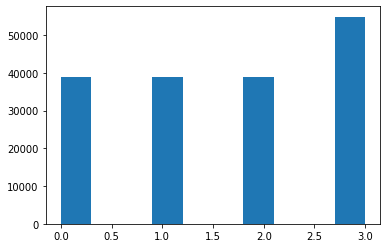

In [53]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['train/labels'])

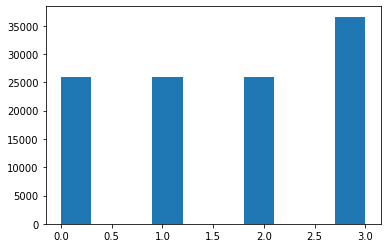

In [54]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['val/labels'])

## Producing ready-to-use dataset with ISOLATED==-1 only grains

In [6]:
readir = 'ready-to-isolate/'

In [7]:
name = 'Carbon/100keV'#'gamma'
name_ = 'Carbon-100keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]==-1; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(161360, 40, 40, 9)
(89129, 40, 40, 9)


In [8]:
del imgs, X_tr, X_val; gc.collect();

In [9]:
name = 'Carbon/60keV'#'gamma'
name_ = 'Carbon-60keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]    
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]==-1; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(242673, 40, 40, 9)
(73427, 40, 40, 9)


In [10]:
del imgs, X_tr, X_val; gc.collect();

In [11]:
name = 'Carbon/30keV'#'gamma'
name_ = 'Carbon-30keV'#'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]==-1; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(218071, 40, 40, 9)
(155087, 40, 40, 9)


In [12]:
del imgs, X_tr, X_val; gc.collect();

In [13]:
name = 'fog'
name_ = 'fog'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    print(imgs.shape)
    pols = df[name+'/pol_ids'][...]; mask = pols[:,-2]==-1; imgs = imgs[mask]
    print(imgs.shape)
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]#; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

(110669, 40, 40, 9)
(85540, 40, 40, 9)


In [14]:
del imgs, X_tr, X_val; gc.collect();

In [15]:
cl_names = ['Carbon-30keV','Carbon-60keV','Carbon-100keV','fog']#'gamma'
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'fog':3} #'gamma'

for tr_type in ['train', 'val']:
    X = np.ones((0,40,40,9), dtype=np.float32)
    y = []
    for name in cl_names:
        with h5py.File(readir+name+'.h5','r') as dfile:
            N_load = dfile[tr_type+'/images'].shape[0]
            if 'kev' in name: N_load /= 1.5
            X = np.vstack((X, dfile[tr_type+'/images'][:N_load]))
            y = np.append(y, np.ones(N_load, dtype=int)*label_dict[name])
    shuff = np.random.permutation(len(y)); X = X[shuff]; y = y[shuff]
    with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','a') as dfile:
        dfile.create_dataset(tr_type+'/images', data=X, dtype=np.float32)
        dfile.create_dataset(tr_type+'/labels', data=y, dtype=int)
    del X, y, shuff; gc.collect();

In [16]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['train/images'].shape)
    print(df['val/images'].shape)

(168324, 40, 40, 9)
(112216, 40, 40, 9)


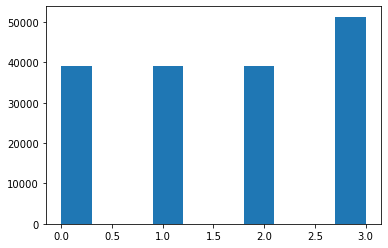

In [17]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['train/labels'])

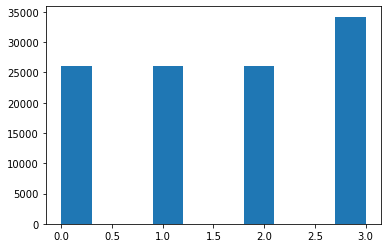

In [18]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['val/labels'])

# Full chain processing of mixed test_sample

In [6]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft =  ['test_sample_2020']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [7]:
name_dict

{'test_sample_2020': 'test_sample_2020'}

In [8]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    #del df['test_sample_2020']
    print(df.keys())

<KeysViewHDF5 ['Carbon', 'fog', 'gamma']>


In [9]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    # tmp solution
    if not ('test' in name):
        shuff = np.random.permutation(pol_ids.shape[0]); pol_ids = pol_ids.iloc[shuff]
    #
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

test_sample_2020
	loading  329  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  9.9min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 28.5min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 38.9min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 48.9min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 67.5min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 85.8min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 97.8min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 124.5min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 145.3min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 165.7min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 193.7min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 221.7min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 244.5min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 279.6min
[Pa

In [11]:
#angles = ['opmark_med']
name = 'test_sample_2020'

start = datetime.now()
# for name in names:
data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    #for ang in angles:
    for p in df[name].keys():
        data_size += df[name+'/'+p+'/images'].shape[0]
        im_shp = df[name+'/'+p+'/images'].shape[1:]
        pol_shp = df[name+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)

with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    #for ang in angles:
    print('Loading:', name)
    for p in tqdm(df[name].keys(), desc='parts'):
        tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
        tmp_pols = df[name+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
        imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
        pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
        n_ims_w += tmp_ims.shape[0]
        big_mask = np.append(big_mask, tmp_mask)
        gc.collect();
print(n_ims_w)

with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('test/'+name+'/images', data=imgs[:n_ims_w])
    df.create_dataset('test/'+name+'/pol_ids', data=pol_ids[:n_ims_w])
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

print(name+' test proc time:', datetime.now()-start)
gc.collect();

parts:   0%|          | 0/329 [00:00<?, ?it/s]

Loading: test_sample_2020


parts: 100%|██████████| 329/329 [13:26<00:00,  2.45s/it]


153495
test_sample_2020 test proc time: 0:14:31.484289


## old

In [15]:
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    print(df['gamma/images'].shape)

(58151, 40, 40, 9)


In [11]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'gamma'
name_ = 'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]#; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

In [12]:
del imgs, X_tr, X_val; gc.collect();

In [19]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
name = 'gamma'
name_ = 'gamma'
#imgs = np.ones((0,40,40,9), dtype=np.float32)
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    imgs = df[name+'/images'][...]
    shuff = np.random.permutation(imgs.shape[0]); imgs = imgs[shuff]; imgs = imgs[:65000]
    #labels = np.ones(imgs.shape[0])
    #imgs = np.vstack((imgs,df[bckg+'/images']))
    #labels = np.append(labels, np.zeros(df[bckg+'/images'].shape[0]))
    
    X_tr, X_val = train_test_split(imgs, test_size=0.4, shuffle=True)
    with h5py.File(readir+name_+'.h5','a') as dfile:
        dfile.create_dataset('train/images', data=X_tr, dtype=np.float32)
        dfile.create_dataset('val/images', data=X_val, dtype=np.float32)

In [21]:
del imgs, X_tr, X_val; gc.collect();

In [21]:
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'gamma':3, 'fog':4}

In [22]:
readir = 'ready-to-float/'
#dset = '/mnt/ML-drive/Artem/Python/NEWS/70nm/data/dataset_phys_clean_9pol.h5'
cl_names = ['Carbon-30keV','Carbon-60keV','Carbon-100keV','gamma','fog']
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'gamma':3, 'fog':4}
#bckg = 'gamma'
#sig = 'Carbon/100keV'
#s_ = 'Carbon-100keV'
# name = 'gamma'
# name_ = 'gamma'
for tr_type in ['train', 'val']:
    X = np.ones((0,40,40,9), dtype=np.float32)
    y = []
    for name in cl_names:
        with h5py.File(readir+name+'.h5','r') as dfile:
            X = np.vstack((X, dfile[tr_type+'/images'][...]))
            y = np.append(y, np.ones(dfile[tr_type+'/images'].shape[0], dtype=int)*label_dict[name])
    shuff = np.random.permutation(len(y)); X = X[shuff]; y = y[shuff]
    with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','a') as dfile:
        dfile.create_dataset(tr_type+'/images', data=X, dtype=np.float32)
        dfile.create_dataset(tr_type+'/labels', data=y, dtype=int)
    del X, y, shuff; gc.collect();

# with h5py.File(readir+s_+'.h5','r') as dfile:
#     X = dfile['val/images'][...]
#     y = np.ones(X.shape[0], dtype=int)
# with h5py.File(readir+bckg+'.h5','r') as dfile:
#     X = np.vstack((X, dfile['val/images'][...]))
#     y = np.append(y, np.zeros(dfile['val/images'].shape[0], dtype=int))
# shuff = np.random.permutation(len(y)); X = X[shuff]; y = y[shuff]
# with h5py.File(readir+s_+'_'+bckg+'.h5','a') as dfile:
#     dfile.create_dataset('val/images', data=X, dtype=np.float32)
#     dfile.create_dataset('val/labels', data=y, dtype=int)
    
# del X, y, shuff; gc.collect();

In [23]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['train/images'].shape)
    print(df['val/images'].shape)

(194469, 40, 40, 9)
(129647, 40, 40, 9)


In [30]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['train/images'].shape)
    print(df['val/images'].shape)

(179819, 40, 40, 9)
(119880, 40, 40, 9)


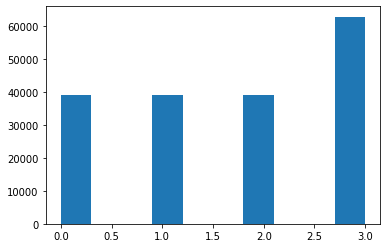

In [31]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['train/labels'])

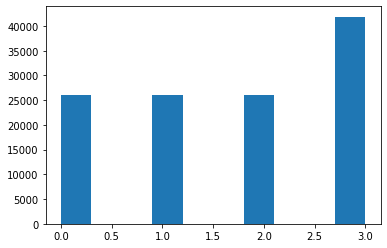

In [32]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as df:
    plt.hist(df['val/labels'])

### Denoising ready-to-use datasets to feed into train-test

In [3]:
import pywt
from skimage.restoration import denoise_wavelet

In [4]:
def denoise_array(Xn, Xdn, im_id):
    print(i, Xn.shape, Xdn.shape)
    for j in range(Xn.shape[-1]):
        if Xn[im_id,...,j].any(): Xdn[im_id,...,j] = denoise_wavelet(Xn[im_id,...,j], wavelet='sym3')

In [5]:
readir = 'ready-to-float/'
cl_names = ['Carbon-30keV','Carbon-60keV','Carbon-100keV','gamma','fog']
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'gamma':3, 'fog':4}

start = datetime.now()
for tr_type in ['train']:#, 'val']:
    with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as dfile:
        X = np.zeros(dfile[tr_type+'/images'].shape, dtype=np.float32)
        #Xn = np.copy(dfile[tr_type+'/images'][:100])
        #Parallel(n_jobs=6, verbose=10)(delayed(denoise_array)(Xn, X, i) for i in np.arange(X.shape[0]))
        with h5py.File(readir+'wavelet_multicl_'+str(len(cl_names))+'.h5','a') as df:
            df.create_dataset(tr_type+'/labels', data=dfile[tr_type+'/labels'][...], dtype=int)
            for i, ims in tqdm(enumerate(dfile[tr_type+'/images']), total=X.shape[0], desc=tr_type):
                for j in range(ims.shape[-1]):
                    if ims[...,j].any(): X[i,...,j] = denoise_wavelet(ims[...,j], wavelet='sym3')
            df.create_dataset(tr_type+'/images', data=X, dtype=np.float32)
    del X; gc.collect();
print('denoising time:', datetime.now()-start)

train: 100%|██████████| 195000/195000 [25:37<00:00, 126.87it/s]


denoising time: 0:26:51.151620


In [6]:
readir = 'ready-to-float/'
cl_names = ['Carbon-30keV','Carbon-60keV','Carbon-100keV','gamma','fog']
label_dict = {'Carbon-30keV':0, 'Carbon-60keV':1, 'Carbon-100keV':2, 'gamma':3, 'fog':4}

start = datetime.now()
for tr_type in ['val']:#, 'val']:
    with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as dfile:
        X = np.zeros(dfile[tr_type+'/images'].shape, dtype=np.float32)
        #Xn = np.copy(dfile[tr_type+'/images'][:100])
        #Parallel(n_jobs=6, verbose=10)(delayed(denoise_array)(Xn, X, i) for i in np.arange(X.shape[0]))
        with h5py.File(readir+'wavelet_multicl_'+str(len(cl_names))+'.h5','a') as df:
            df.create_dataset(tr_type+'/labels', data=dfile[tr_type+'/labels'][...], dtype=int)
            for i, ims in tqdm(enumerate(dfile[tr_type+'/images']), total=X.shape[0], desc=tr_type):
                for j in range(ims.shape[-1]):
                    if ims[...,j].any(): X[i,...,j] = denoise_wavelet(ims[...,j], wavelet='sym3')
            df.create_dataset(tr_type+'/images', data=X, dtype=np.float32)
    del X; gc.collect();
print('denoising time:', datetime.now()-start)

val: 100%|██████████| 130000/130000 [17:01<00:00, 127.29it/s]


denoising time: 0:17:40.495154


(195000, 40, 40, 9)


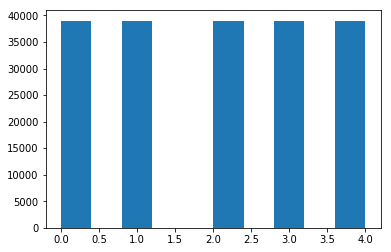

In [7]:
with h5py.File(readir+'wavelet_multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['train/images'].shape)
    plt.hist(df['train/labels'])

(130000, 40, 40, 9)


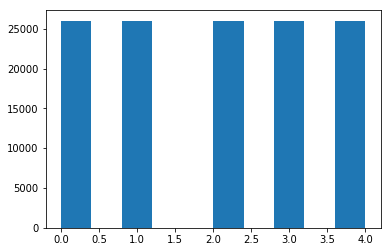

In [8]:
with h5py.File(readir+'wavelet_multicl_'+str(len(cl_names))+'.h5','r') as df:
    print(df['val/images'].shape)
    plt.hist(df['val/labels'])

[True, True, True, True, False, False, False, True, True]

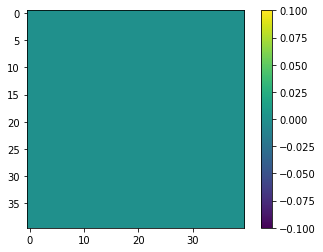

In [15]:
with h5py.File(readir+'multicl_'+str(len(cl_names))+'.h5','r') as dfile:
    copa = dfile['train/images'][3245]
plt.imshow(copa[...,5])
plt.colorbar()
[copa[...,i].any() for i in range(copa.shape[-1])]

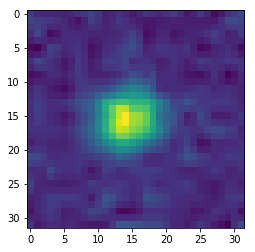

0.0024875877

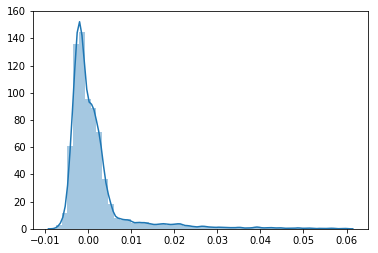

In [162]:
#%%timeit
dopa = denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
plt.imshow(dopa[...,2])
plt.show()
sns.distplot(dopa[...].ravel());
dopa[20:60,20:60].std()

### Producing batched ready-to-use datasets to feed into multiprocessing batch generator

In [9]:
batch_size=512
if not os.path.exists('ready-to-batch-'+str(batch_size)):
    os.makedirs('ready-to-batch-'+str(batch_size))
readir = 'ready-to-batch-'+str(batch_size)+'/'
bckg_names = ['fog']
with h5py.File('dataset_phys_clean_9pol.h5','r') as df:
    sig_names = ['Carbon/'+s for s in df['Carbon'].keys()]

In [10]:
class_keys = ['Carbon/30keV', 'Carbon/60keV', 'Carbon/100keV', 'fog']
class_keys

['Carbon/30keV', 'Carbon/60keV', 'Carbon/100keV', 'fog']

In [11]:
ims, feats = {},{}
i='images'
with h5py.File('dataset_phys_clean_9pol.h5', 'r') as dfile:
    for name in class_keys:
        for t in ['train','val']:
            n_bal = dfile['fog/'+i+'/'+t].shape[0]
            ims[name+'/'+t+'/'+i] = dfile[name+'/'+i+'/'+t][...]
            numb = ims[name+'/'+t+'/'+i].shape[0]
            shuff = np.random.permutation(numb)
            if 'Carbon' in name: ims[name+'/'+t+'/'+i] = ims[name+'/'+t+'/'+i][shuff[:n_bal]]

In [12]:
ims.keys()

dict_keys(['Carbon/30keV/train/images', 'Carbon/30keV/val/images', 'Carbon/60keV/train/images', 'Carbon/60keV/val/images', 'Carbon/100keV/train/images', 'Carbon/100keV/val/images', 'fog/train/images', 'fog/val/images'])

In [13]:
%%time
for s in sig_names:
    s_ = '-'.join(s.split('/'))
    for b in bckg_names:
        b_ = '-'.join(b.split('/'))
        with h5py.File(readir+s_+'_'+b_+'.h5','a') as sb_file:
            for t in ['train','val']:
                X_im = np.vstack((ims[s+'/'+t+'/images'],ims[b+'/'+t+'/images']))
                y = np.append(np.ones(ims[s+'/'+t+'/images'].shape[0]),np.zeros(ims[b+'/'+t+'/images'].shape[0]))
                shuff = np.random.permutation(len(y))
                batch_ids = np.arange(np.ceil(X_im.shape[0] / float(batch_size)), dtype=int)
                for i in batch_ids:
                    save_ids = list(shuff[i * batch_size:(i + 1) * batch_size])
                    sb_file.create_dataset(t+'/'+str(i)+'/images', data=X_im[save_ids], dtype=np.float32)
                    sb_file.create_dataset(t+'/'+str(i)+'/labels', data=y[save_ids], dtype=int)

CPU times: user 20.8 s, sys: 17.9 s, total: 38.7 s
Wall time: 5min 34s


In [14]:
with h5py.File(readir+'Carbon-30keV_fog.h5','r') as sb_file:
    print(len(sb_file['train'].keys()))
    print(sb_file['train/1/images'].shape)

325
(512, 32, 32, 9)


* Example of loading the libDMRoot in PyROOT

In [52]:
f = ROOT.TFile.Open(path_dir+'C60keV/dm_tracks.dm.root','read')

Error in <TFile::TFile>: file /mnt/ML-drive/Artem/70nm/C60keV/dm_tracks.dm.root does not exist


In [53]:
ROOT.gSystem.Load('libDMRoot')

0

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm


In [54]:
arun = ROOT.DMRRun("dm_tracks.dm.root")

DMRRun::OpenNew : Open new file dm_tracks.dm.root


Warning in <TTree::Bronch>: Using split mode on a class: DMRCluster with a custom Streamer
Warning in <TTree::Bronch>: Using split mode on a class: DMRGrain with a custom Streamer
Warning in <TTree::Bronch>: Using split mode on a class: DMRMicrotrack with a custom Streamer
Warning in <TTree::Bronch>: Using split mode on a class: DMRImageCl with a custom Streamer
Warning in <TTree::Bronch>: Using split mode on a class: DMRFrame with a custom Streamer
